## Overview

The World Health Organization (WHO) reports that approximately 17.9 million individuals lose their lives each year due to cardiovascular diseases (CVDs), highlighting a significant global health crisis. Various factors contribute to the onset of CVD, including poor dietary choices, insufficient physical activity, and the impact of mental health conditions. Identifying these risk factors early in individuals is crucial for implementing preventive measures that can save lives and reduce the incidence of premature death.

In our project, we plan to leverage a comprehensive dataset available from UCI Machine Learning Repository to develop machine learning models to assess and predict the likelihood that a patient will develop heart disease in the future, thereby providing valuable insights that can guide both individual patient care and broader public health strategies.

This project follows a 5 step approach:

1. Data Collection
2. Exploratory Data Analysis
3. Feature Engineering
4. Model Selection & Training
5. Model Evaluation

### Importing Libraries for data collection and analysis

In [1]:
import pandas as pd

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('Set2')

import matplotlib.pyplot as plt
%matplotlib inline

## Data Collection

### Source
This dataset combines five independent heart disease datasets through 11 common features, making it the largest available for research purposes.

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations
- Total: 1190 observations
- Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository at the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

### Citation
```fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.```

### Acknowledgements

Creators:

- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

## Exploratory Data Analysis
Per the source, each patient had the following information collected:

1. `Age`: age of the patient [years]
2. `Sex`: sex of the patient [M: Male, F: Female]
3. `ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. `RestingBP`: resting blood pressure [mm Hg]
5. `Cholesterol`: serum cholesterol [mg/dl]
6. `FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. `RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. `MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]
9. `ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]
10. `Oldpeak`: oldpeak = ST [Numeric value measured in depression]
11. `ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. `HeartDisease`: output class [1: heart disease, 0: Normal]

Let's begin by importing the dataset and examining it's data types

In [2]:
heart_data = pd.read_csv("./datasets/heart.csv")

In [3]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
print(heart_data.dtypes)
heart_data.dtypes.value_counts()

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


int64      6
object     5
float64    1
Name: count, dtype: int64

There are a total of `12` features. Upon further examination, `FastingBS` and `HeartDisease` are categorical though their types are int64. Out of the total features, `5` are numerical, while `7` are categorical.

### EDA: Numerical Values

In [5]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The table above shows the following observations:

- The average age of the patient is 53.
- RestingBP and Cholesterol minimum values are 0 and will need to be addressed.
- Cholesterol median is `25mg/dl` above its mean, indicating a left-skewed distribution.
- The standard deviations vary quite a bit and could perform better when standardized during the feature engineering process.

We also need to check for null values and observe the distribution of features:

In [6]:
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

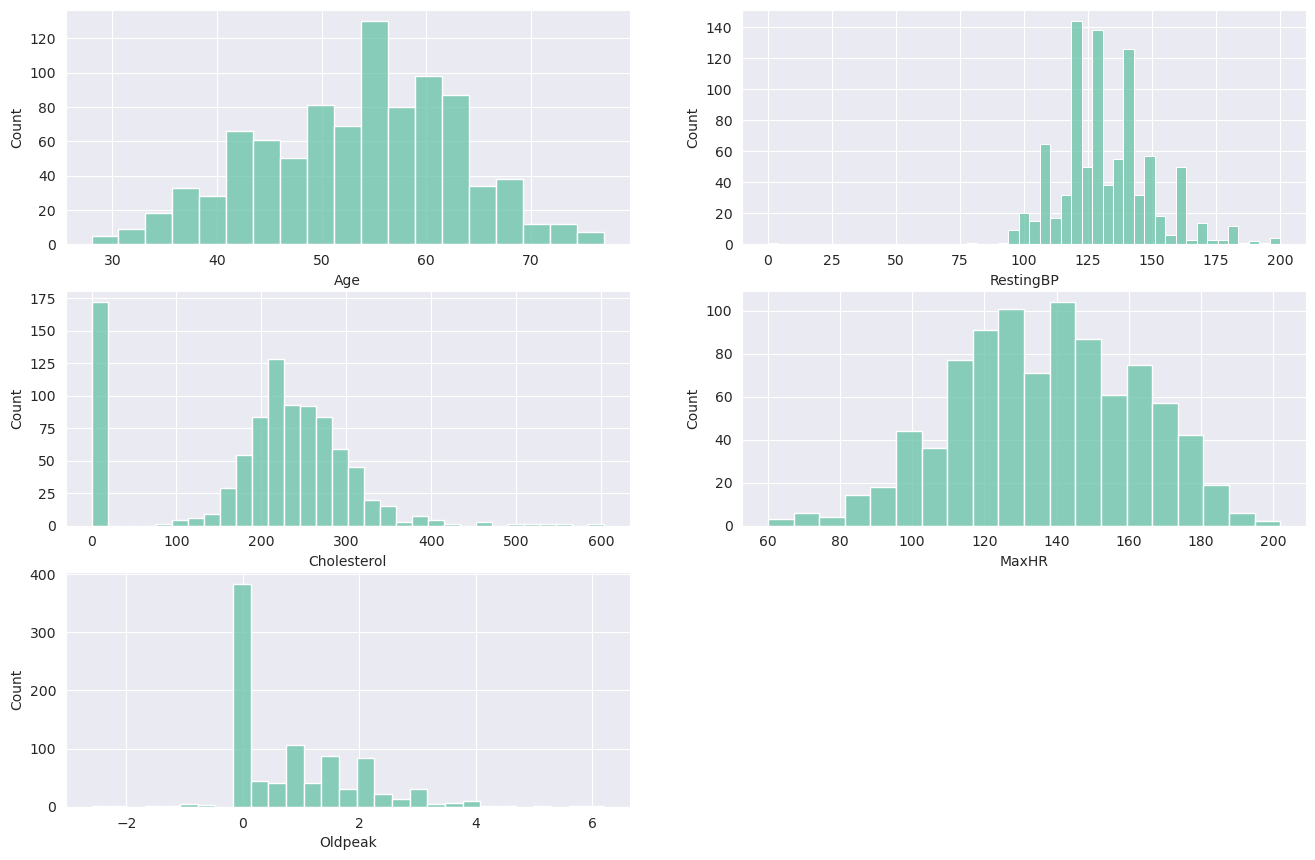

In [7]:
numerical_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
fig = plt.figure(figsize=(16,14))

for idx, col in enumerate(numerical_columns):
    ax = plt.subplot(4, 2, idx+1)
    sns.histplot(x=heart_data[col], ax=ax)

From the numerical variables graphs, we can make a few observations:

- `Age`, `RestingBP`, and `MaxHR` distributions are relatively normal.
- `Cholesterol` has a significant amount of 0 values that stand out. Will fix this later using the mean or median by Sex.
- The `Oldpeak` value range is right-skewed, with the majority of values being 0. It would be beneficial to have a Domain expert elaborate on the expected values for this feature and how it affects patients.

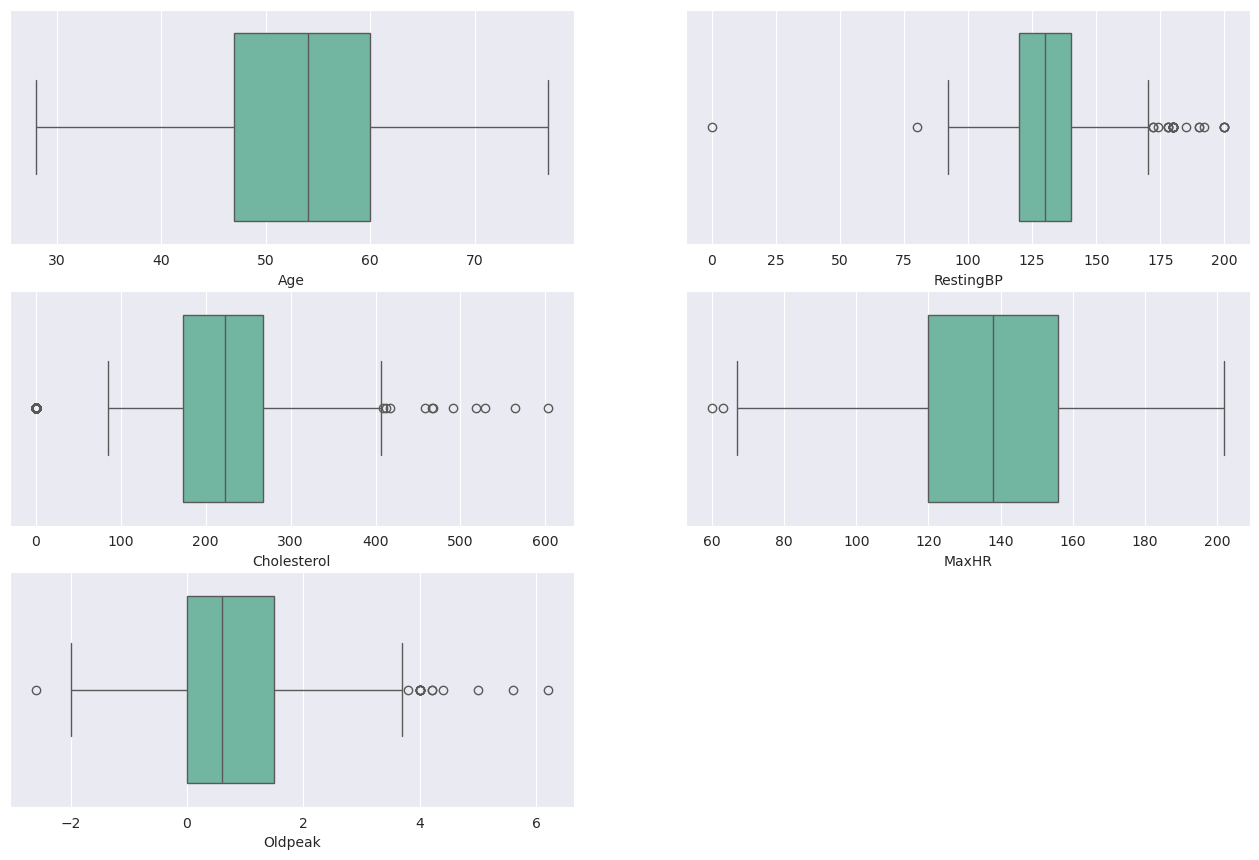

In [8]:
fig = plt.figure(figsize=(16,14))

for idx, col in enumerate(numerical_columns):
    ax = plt.subplot(4, 2, idx+1)
    sns.boxplot(x=heart_data[col], ax=ax)

Overall, four of five numerical variables have outliers that need to be addressed during the feature engineering process. In later steps, we will normalize the values to handle outliers as the models we will be using are sensitive to them. 

### EDA:Categorical Variables

In [9]:
heart_data.describe(include=['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


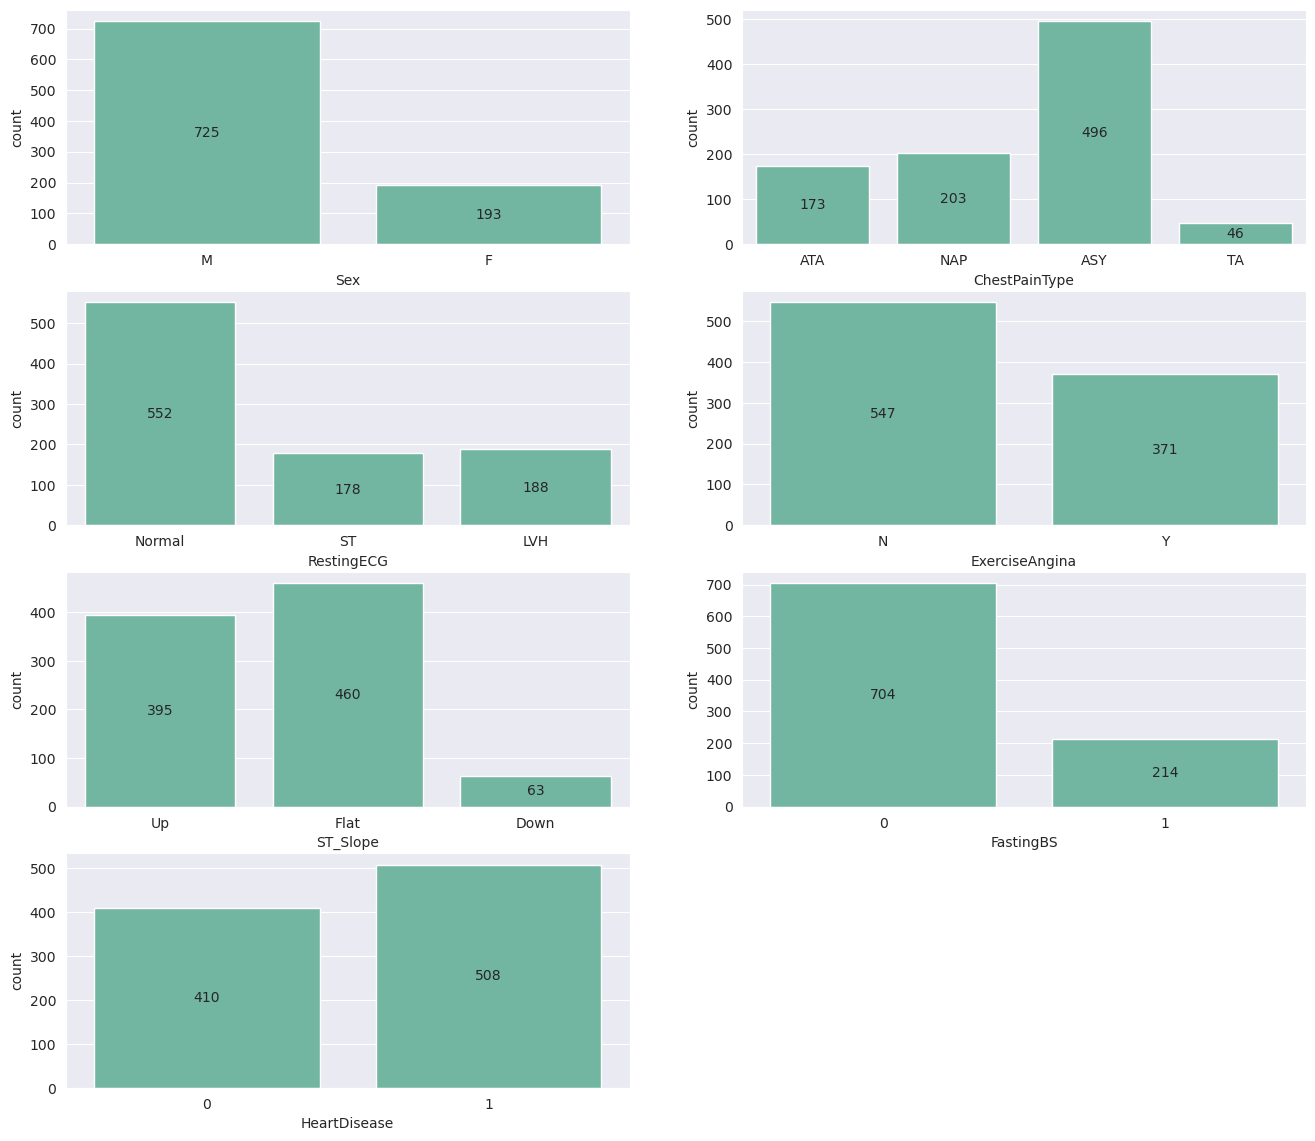

In [10]:
categorical_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "FastingBS", "HeartDisease"]

fig = plt.figure(figsize=(16,14))

for idx, col in enumerate(categorical_columns):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=heart_data[col], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")


From the visualization above, a few observations stand out:

- `725` of our patients are Male, an indicator that our models could pick be bias.
- `494` patients are Asymptomatic when evaluated for heart disease
- `704` had low blood sugar
- Our target variable is relatively balanced so accuracy can be used for our model evaluation.

Next we will group the categorical columns by Heart Disease.

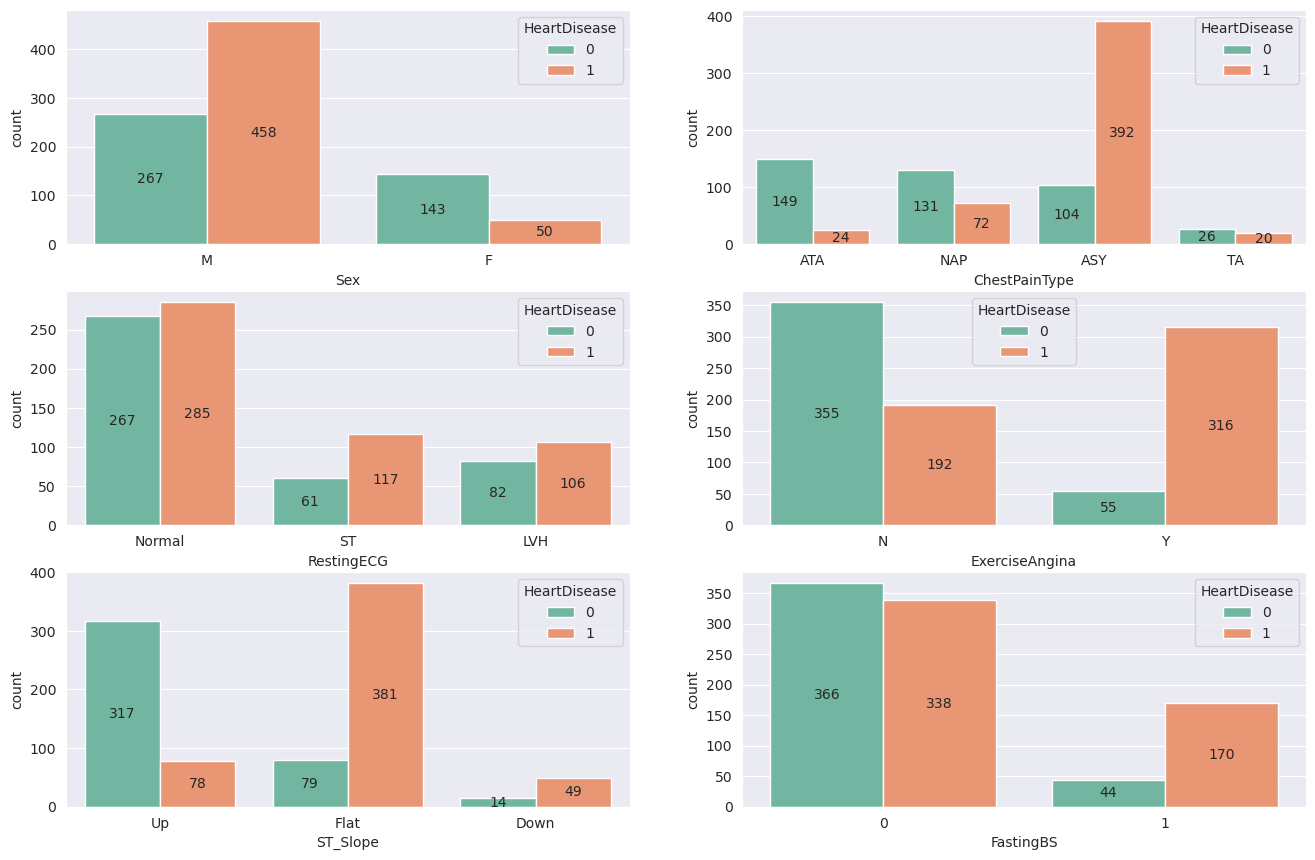

In [11]:
categorical_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "FastingBS", "HeartDisease"]

fig = plt.figure(figsize=(16,14))
# removing heart disease
for idx, col in enumerate(categorical_columns[:-1]):
    ax = plt.subplot(4, 2, idx+1)
    # group by heart disease using hue
    sns.countplot(x=heart_data[col], ax=ax, hue=heart_data["HeartDisease"])
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

Observation:

- 63% of males in our dataset have heart disease, while 25% of females have heart disease.
- 42% of patients with heart disease presented with Asymptomatic `ChestPainType`.
- 41% of patients with heart diseases had an ST_Slope measurement of `Flat`.

### Data Cleaning

In this section will clean up the discrepancies identified in the EDA section.

As mentioned previously, RestingBP and Cholesterol have 0 values. We can start by examining how many 0 values there are and determine the best approach to handling them.

In [12]:
print(heart_data[heart_data["RestingBP"] == 0].index)

Index([449], dtype='int64')


RestingBP only has a single row with a 0 value and can safely be dropped.

In [13]:
heart_data_clean = heart_data[heart_data["RestingBP"] != 0]
heart_data_clean.shape

(917, 12)

In [14]:
print(heart_data_clean[heart_data_clean["Cholesterol"] == 0].groupby(["Sex"])["Sex"].count())
print(heart_data_clean.groupby(["Sex"])["Cholesterol"].median())
print(heart_data_clean.groupby(["Sex"])["Cholesterol"].mean())

Sex
F     11
M    160
Name: Sex, dtype: int64
Sex
F    243.0
M    219.0
Name: Cholesterol, dtype: float64
Sex
F    241.196891
M    187.772099
Name: Cholesterol, dtype: float64


`Cholesterol` has 171 rows with 0 values. Dropping these rows would reduce our dataset by 18%. To avoid losing that much valuable data, we can experiment with using the median and mean to see how it affects our models performance. There are a few methods we can use to impute this missing value. We could use the aggregate statistics of the entire dataset but our dataset is bias towards males. From the output in the previous cell, we can also see there's quite a gap between the median and mean when viewed by sex. To account for this, we will use the aggregate statistics by sex to fill in the missing values.

Note: Though not shown, you can modify the code block below to use `.mean()` on each series. After trying both median and mean, the median provided the best results with the models used. There are other methods we could use, such as KNN to more accurately identify the missing values but will not be shown in this project.

In [22]:
female_cholesterol_median = heart_data_clean[heart_data_clean['Sex'] == 'F']['Cholesterol'].median()
heart_data_clean.loc[(heart_data_clean['Cholesterol'] == 0) & 
                          (heart_data_clean['Sex'] == 'F'), 'Cholesterol'] = female_cholesterol_median

In [16]:
male_cholesterol_median = heart_data_clean[heart_data_clean['Sex'] == 'M']['Cholesterol'].median()
heart_data_clean.loc[(heart_data_clean['Cholesterol'] == 0) & 
                          (heart_data_clean['Sex'] == 'M'), 'Cholesterol'] = male_cholesterol_median

In [17]:
heart_data_clean.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,240.142857,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,54.226682,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Feature Engineering, Model Building, and Evaluation

Now that we have completed EDA and have a better understanding of our features, we can start to experiment with various features to see how they impact our models performance. We are going to approach this by:

1. Feature Engineering - Building a pipeline with transformers for numerical and categorical data. As well as using SelectKBest to find best features.
2. Build a KNN and Logistic Regression Model
3. Hyperparameter tune using Grid Search

In [18]:
from sklearn.model_selection import train_test_split

# heart_data_clean_copy = pd.get_dummies(heart_data_clean, drop_first=True)

X = heart_data_clean.drop("HeartDisease", axis=1)
y = heart_data_clean["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=417)

### KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

# Define transformers for numerical and categorical data
numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, make_column_selector(dtype_exclude=object)),
        ('categorical', categorical_transformer, make_column_selector(dtype_include=object))
    ])

# Create a pipeline with KNeighbors
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif)), 
    ('classifier', KNeighborsClassifier())
])

# Define the parameter grid
param_grid = {
    'feature_selection__k': range(1, X_train.shape[1] + 1),
    'classifier__n_neighbors': range(1, 20), 
    'classifier__metric': ["minkowski", "manhattan"]
}

# Create the GridSearchCV object
grid_knn = GridSearchCV(knn_pipeline, param_grid=param_grid, cv=5) 

# Fit the grid search to the data
grid_knn.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters found: ", grid_knn.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_knn.best_score_))

# Evaluate the model with the best found parameters on the test data
test_accuracy = grid_knn.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy:.2f}")

Best parameters found:  {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 10, 'feature_selection__k': 11}
Best cross-validation score: 0.87
Test set accuracy: 0.87


/opt/conda/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

# Define transformers for numerical and categorical data
numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, make_column_selector(dtype_exclude=object)),
        ('categorical', categorical_transformer, make_column_selector(dtype_include=object))
    ])

# Create a pipeline with logistic regression
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Define the parameter grid
param_grid = {
    'feature_selection__k': range(1, X_train.shape[1] + 1),
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'] 
}

# Create the GridSearchCV object
grid_logreg = GridSearchCV(logreg_pipeline, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_logreg.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters found (Logistic Regression): ", grid_logreg.best_params_)
print("Best cross-validation score (Logistic Regression): {:.2f}".format(grid_logreg.best_score_))

# Evaluate the model with the best found parameters on the test data
test_accuracy_logreg = grid_logreg.score(X_test, y_test)
print(f"Test set accuracy (Logistic Regression): {test_accuracy_logreg:.2f}")

Best parameters found (Logistic Regression):  {'classifier__C': 1, 'classifier__penalty': 'l2', 'feature_selection__k': 10}
Best cross-validation score (Logistic Regression): 0.86
Test set accuracy (Logistic Regression): 0.87


### Summary

In this project, the goal was to develop machine learning models to predict the likelihood of individuals developing heart disease, which is a critical task given the global health crisis posed by cardiovascular diseases (CVDs). Utilizing a comprehensive dataset from Kaggle and following a structured five-step methodology, we aimed to identify key risk factors and improve early detection, helping to guide both individual patient care and public health strategies. Our approach included data collection, exploratory data analysis, feature engineering, model selection and training, and model evaluation. This systematic process ensured that our models were both robust and interpretable, with a particular focus on cleaning data to remove zero values from critical features such as resting blood pressure and cholesterol levels.

Utilizing two primary algorithms, K-Nearest Neighbors (KNN) and Logistic Regression, we developed feature engineering pipelines that included preprocessing steps such as Min-Max Scaling, followed by feature selection with SelectKBest. With these pipelines in place, we conducted hyperparameter tuning using GridSearchCV. The KNN model achieved a best test accuracy of 87%, with selected features including age, resting blood pressure, and various categorical features related to chest pain type and exercise-induced angina. Similarly, the logistic regression model also performed well, with a test accuracy of 87%, identifying a slightly different set of influential features. The insights gained from these models highlight the importance of certain health indicators and lifestyle factors in predicting heart disease, underscoring the potential of machine learning in enhancing healthcare outcomes through preventive strategies.

However, given the limitations of our data this accuracy might not be indicative of a well performing model. There are quite a few things we could try next to get better results:

- Try out different features.
- Broaden our feature engineering efforts and feature selection techniques such as using PCA or feature extraction.
- Expand the grid search parameters to identify more optimal hyperparameters.
- Explore other algorithms that might perform better than k-NN or logistic regression.
- Try and collect more data.
- Consult domain experts.